# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- Считать данные и вывести их основные характеристики, описание признаков.
- Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

### Выбранный датасет

Был выбран датасет [Sleep Efficiency Dataset](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency), описывающий эффективность сна в зависимости от ряда параметров.

Атрибуты:
- `ID` - уникальный идентификатор
- `Age` - возраст
- `Gender` - гендер
- `Bedtime` - время засыпания
- `Wakeup time` - время пробуждения
- `Sleep duration` - время сна в часах
- `Sleep efficiency` - доля времени, проведенного в постели во сне
- `REM sleep percentage` - фаза быстрого сна в процентах
- `Deep sleep percentage` - фаза глубокого сна в процентах
- `Light sleep percentage` - фаза поверхностного сна в процентах
- `Awakenings` - количество пробуждений
- `Caffeine consumption` - количество кофеина, употреблённого менее чем за 24 часа до сна в мг
- `Alcohol consumption` - количество алкоголя, употреблённого менее чем за 24 часа до сна в унциях
- `Smoking status` - курящий ли
- `Exercise frequency` - количество занятий спортом в неделю

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("../../data/Sleep_Efficiency/Sleep_Efficiency.csv")
df.head()

C:\Users\toxakaz\AppData\Local\Temp\ipykernel_5356\2558761509.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [3]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

### Подготовка датасета

Проверим, сколько процентов записей с недостающими данными.

In [4]:
row_with_nan_count = df.isna().any(axis=1).sum()
print(f"{round(row_with_nan_count / len(df) * 100)}%")

14%


К сожалению как либо осмысленно заполнить атрибуты с пропусками значений `Awakenings`, `Caffeine consumption`, `Alcohol consumption`, `Exercise frequency` нельзя, а они, вероятно, влияют на целевой атрибут.

Так как в процентном соотношении таких данных не слишком много, удалим записи с ними из датасета.

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      388 non-null    int64  
 1   Age                     388 non-null    int64  
 2   Gender                  388 non-null    object 
 3   Bedtime                 388 non-null    object 
 4   Wakeup time             388 non-null    object 
 5   Sleep duration          388 non-null    float64
 6   Sleep efficiency        388 non-null    float64
 7   REM sleep percentage    388 non-null    int64  
 8   Deep sleep percentage   388 non-null    int64  
 9   Light sleep percentage  388 non-null    int64  
 10  Awakenings              388 non-null    float64
 11  Caffeine consumption    388 non-null    float64
 12  Alcohol consumption     388 non-null    float64
 13  Smoking status          388 non-null    object 
 14  Exercise frequency      388 non-null    float64

Так как сумма параметров `REM sleep percentage`, `Light sleep percentage`, `Deep sleep percentage` всегда равна 100%, один из этих параметров можно исключить.

In [6]:
(df["REM sleep percentage"] + df["Light sleep percentage"] + df["Deep sleep percentage"] == 100).all()

True

In [7]:
df = df.drop(columns="REM sleep percentage")

Так как в датасете присутствует атрибут `Sleep duration`, один из атрибутов `Bedtime` и `Wakeup time` можно исключить.

Для данного датасета важнее время засыпания, а не полная дата. Разделим эти параметры.

In [8]:
def get_date(date):
    return datetime.strptime(date, "%Y-%m-%d %H:%M:%S")

def str_time_to_hour(time):
    time = get_date(time)
    return time.hour + time.minute / 60 + time.second / 60

df["Bedtime hour"] = df["Bedtime"].apply(str_time_to_hour)

df = df.drop(columns="Wakeup time")

Посмотрим, за сколько лет были собраны данные.

In [9]:
df["Bedtime"].apply(lambda date: get_date(date).year).unique()

array([2021], dtype=int64)

Так как данные были собраны только в 2021 году, можно оставить только месяца и дни.

Таким образом оставим только месяц и дату засыпания.

In [10]:
df["Hour"] = df["Bedtime hour"]
df["Day"] = df["Bedtime"].apply(lambda date: get_date(date).day)
df["Month"] = df["Bedtime"].apply(lambda date: get_date(date).month)
df = df.drop(columns=["Bedtime", "Bedtime hour"])

Далее заменим нечисловые данные на числовые.

In [11]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df["Smoking status"].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df["Gender"] = df["Gender"].apply(lambda gender: 1 if gender == "Male" else 0)
df["Smoking status"] = df["Smoking status"].apply(lambda status: 1 if status == "Yes" else 0)

Преведём единицы измерения `Alcohol consumption` к мг.

In [14]:
df["Alcohol consumption"] = df["Alcohol consumption"].apply(lambda x: x * 29.57353)

Параметры `Awakenings` и `Exercise frequency` могут быть целочисленными.

In [15]:
df["Awakenings"].apply(float.is_integer).all()

True

In [16]:
df["Exercise frequency"].apply(float.is_integer).all()

True

In [17]:
df["Awakenings"] = df["Awakenings"].apply(int)
df["Exercise frequency"] = df["Exercise frequency"].apply(int)

Так же удалим ненужный атрибут: `ID`.

In [18]:
df = df.drop(columns="ID")

In [19]:
df.head()

,Age,Gender,Sleep duration,Sleep efficiency,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Hour,Day,Month
0,65,0,6.0,0.88,70,12,0,0.0,0.00000,1,3,1.0,6,3
1,69,1,7.0,0.66,28,53,3,0.0,88.72059,1,3,2.0,5,12
2,40,0,8.0,0.89,70,10,1,0.0,0.00000,0,3,21.5,25,5
3,40,0,6.0,0.51,25,52,3,50.0,147.86765,1,1,2.5,3,11
4,57,1,8.0,0.76,55,18,3,0.0,88.72059,0,3,1.0,13,3


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     388 non-null    int64  
 1   Gender                  388 non-null    int64  
 2   Sleep duration          388 non-null    float64
 3   Sleep efficiency        388 non-null    float64
 4   Deep sleep percentage   388 non-null    int64  
 5   Light sleep percentage  388 non-null    int64  
 6   Awakenings              388 non-null    int64  
 7   Caffeine consumption    388 non-null    float64
 8   Alcohol consumption     388 non-null    float64
 9   Smoking status          388 non-null    int64  
 10  Exercise frequency      388 non-null    int64  
 11  Hour                    388 non-null    float64
 12  Day                     388 non-null    int64  
 13  Month                   388 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 45.5 KB


### Анализ данных

Распределения атрибутов:

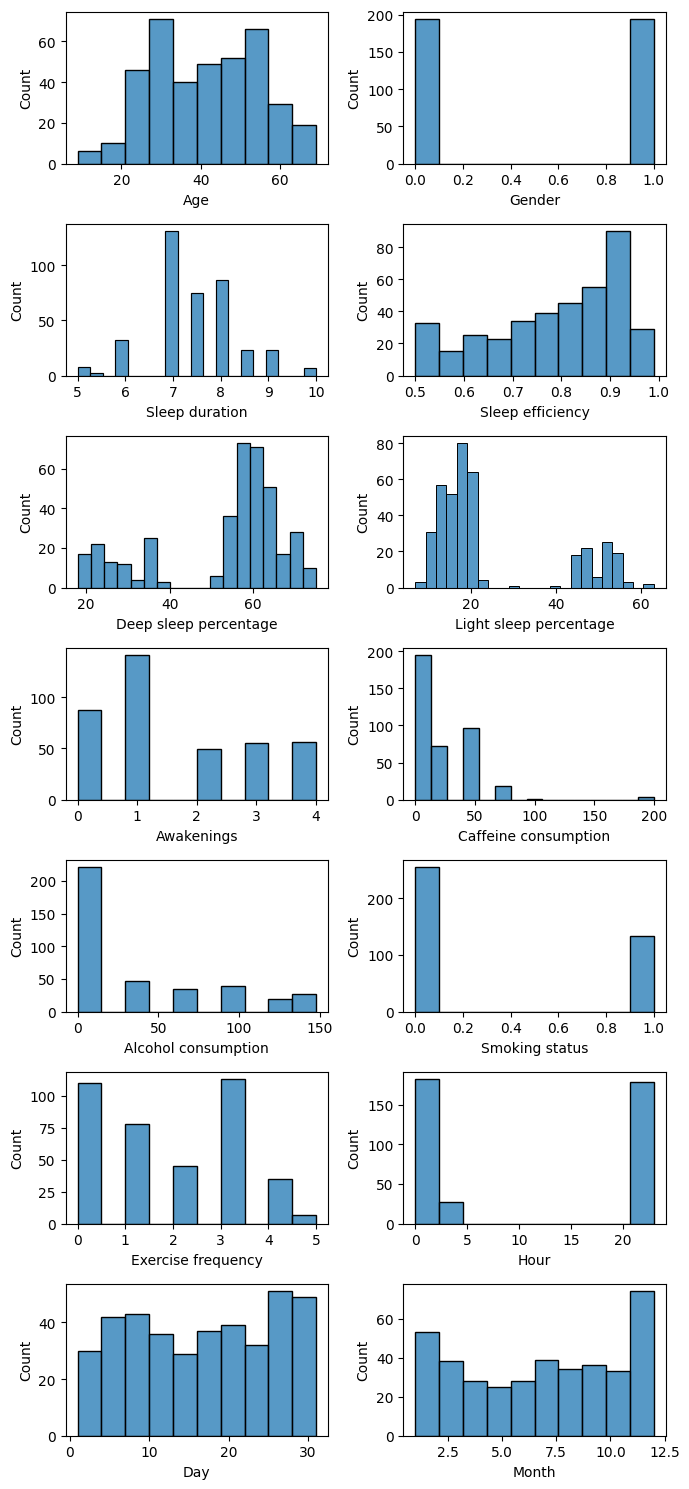

In [21]:
fig = plt.figure(figsize=(7, 15), tight_layout=True)
gs = fig.add_gridspec(7, 2)
for i in range(7):
    for j in range(2):
        sns.histplot(df[df.columns[2 * i + j]], ax=fig.add_subplot(gs[i, j]))

Проверим зависимость между `Sleep efficiency` и `Deep sleep percentage`.

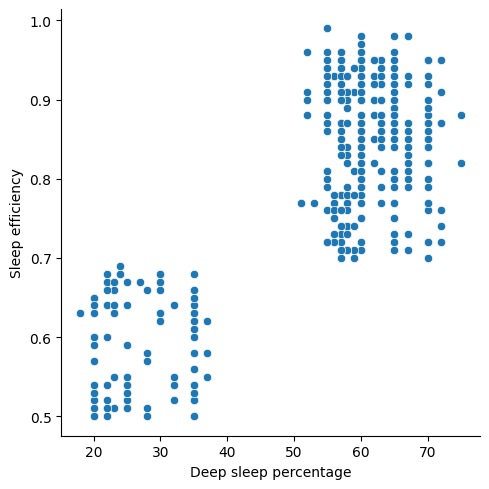

In [22]:
sns.relplot(df, x="Deep sleep percentage", y="Sleep efficiency")

Видим сильную зависимость между этими признаками. Это ожидаемо, так как при длительном времени глубокого сна меньше шанс проснуться.

c:\toxakaz\projects\2024\ml-course\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\toxakaz\projects\2024\ml-course\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Smoking status', ylabel='Sleep efficiency'>

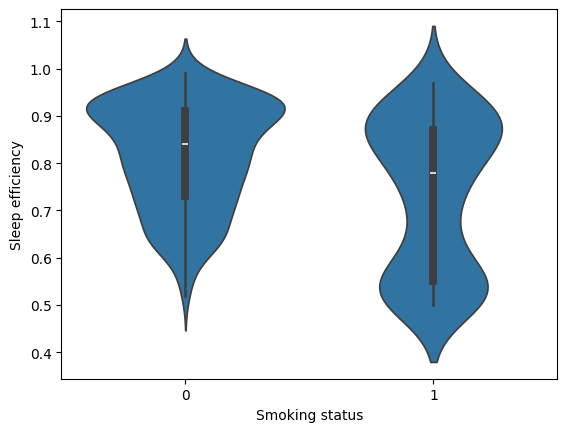

In [23]:
sns.violinplot(df, x="Smoking status", y="Sleep efficiency")

c:\toxakaz\projects\2024\ml-course\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\toxakaz\projects\2024\ml-course\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\toxakaz\projects\2024\ml-course\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\toxakaz\projects\2024\

<Axes: xlabel='Exercise frequency', ylabel='Sleep efficiency'>

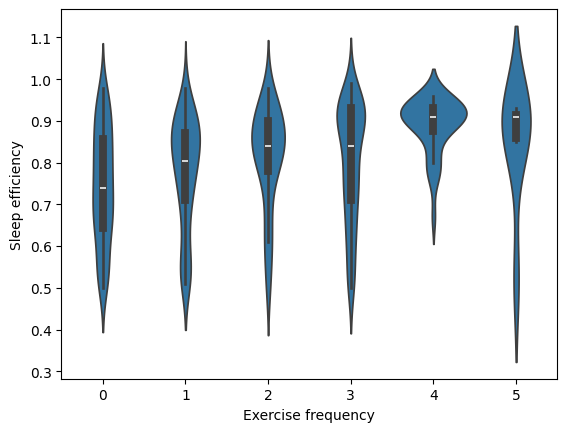

In [24]:
sns.violinplot(df, x="Exercise frequency", y="Sleep efficiency")

c:\toxakaz\projects\2024\ml-course\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\toxakaz\projects\2024\ml-course\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\toxakaz\projects\2024\ml-course\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\toxakaz\projects\2024\

<Axes: xlabel='Awakenings', ylabel='Sleep efficiency'>

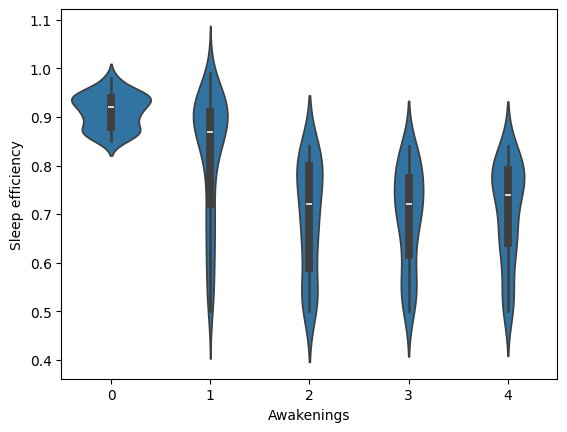

In [25]:
sns.violinplot(df, x="Awakenings", y="Sleep efficiency",)

Видим ожидаемые зависимости:
- курение может вызывать проблемы со сном
- при более частых упражнениях сон лучше
- пробуждения негативно сказываются на качестве сна

### Матрица корреляции

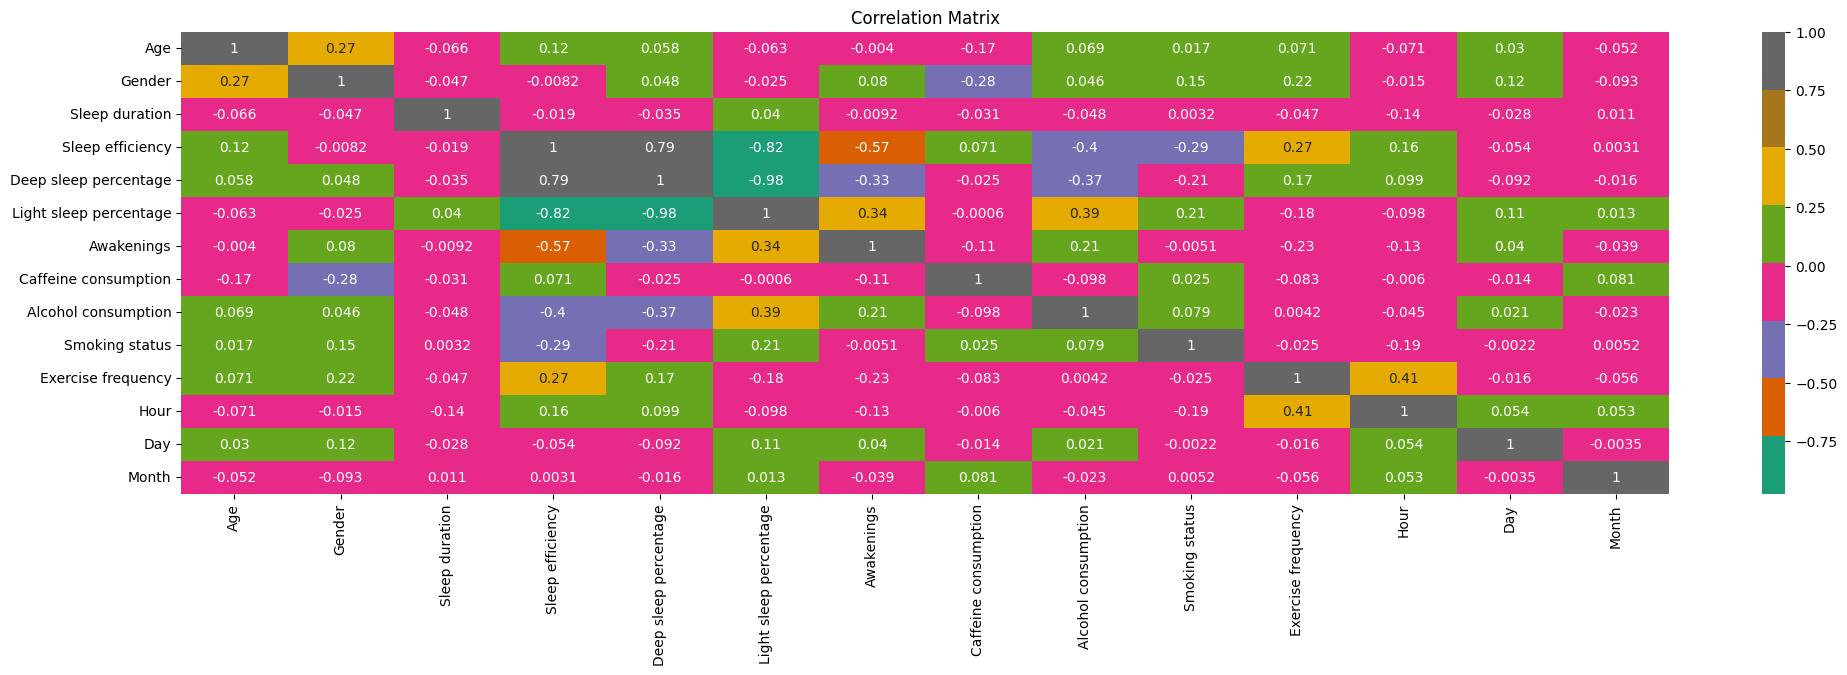

In [26]:
df_corr = df.corr()
plt.figure(figsize=(24, 6))
sns.heatmap(df_corr, annot=True, cmap="Dark2")
plt.title("Correlation Matrix")
plt.show()

Видно, что между собой сильно коррелируют параметры `Deep sleep percentage`, `Light sleep percentage`, `Sleep efficiency`.